=== Coloring Summary ===
   Node  Greedy_Color  Welsh_Powell_Color
0     1             0                   2
1     2             1                   0
2     3             2                   1
3     4             0                   2
4     5             1                   0
5     6             2                   1
6     7             0                   0
7     8             2                   1
8     9             1                   2
9    10             0                   0


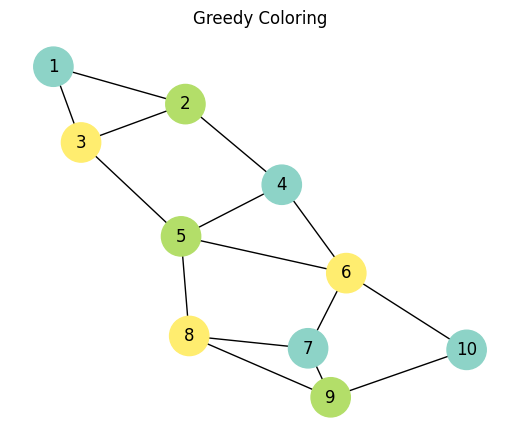

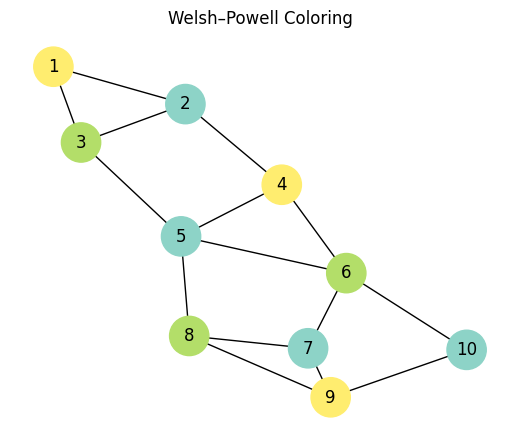


=== Register Usage ===
Greedy requires 3 registers
Welsh–Powell requires 3 registers


In [1]:
# ------------------------------------------------------------
# Practical: Optimize register allocation using graph coloring
# ------------------------------------------------------------

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------------------------------------
# Helper utilities
# ------------------------------------------------------------
def build_interference_graph(edges=None):
    """
    Return a sample interference graph as networkx.Graph().
    If edges are provided, use them. Otherwise, return a sample graph.
    """
    G = nx.Graph()
    if edges:
        G.add_edges_from(edges)
    else:
        # Example interference graph (10 variables)
        nodes = list(range(1, 11))
        G.add_nodes_from(nodes)
        sample_edges = [
            (1, 2), (1, 3), (2, 3), (2, 4), (3, 5),
            (4, 5), (4, 6), (5, 6), (6, 7), (5, 8),
            (7, 8), (7, 9), (8, 9), (9, 10), (6, 10)
        ]
        G.add_edges_from(sample_edges)
    return G


def greedy_coloring(G, order=None):
    """Simple greedy coloring. If order provided, use that node order."""
    if order is None:
        nodes = list(G.nodes())
    else:
        nodes = list(order)
    color = {}
    for node in nodes:
        neighbor_colors = {color[n] for n in G.neighbors(node) if n in color}
        c = 0
        while c in neighbor_colors:
            c += 1
        color[node] = c
    return color


def welsh_powell_coloring(G):
    """Welsh–Powell: sort vertices by degree (descending), then greedy color."""
    order = sorted(G.nodes(), key=lambda n: G.degree(n), reverse=True)
    return greedy_coloring(G, order)


# ------------------------------------------------------------
# Step 1 — Create the graph and compute colorings
# ------------------------------------------------------------
G = build_interference_graph()

col_greedy = greedy_coloring(G)
col_wp = welsh_powell_coloring(G)

# Create a DataFrame summary
summary = pd.DataFrame({
    'Node': list(G.nodes()),
    'Greedy_Color': [col_greedy[n] for n in G.nodes()],
    'Welsh_Powell_Color': [col_wp[n] for n in G.nodes()]
})

print("=== Coloring Summary ===")
print(summary)


# ------------------------------------------------------------
# Step 2 — Visualization
# ------------------------------------------------------------
def draw_coloring(G, coloring, title):
    plt.figure(figsize=(5, 4))
    pos = nx.spring_layout(G, seed=42)
    colors = [coloring[n] for n in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=colors, cmap='Set3', node_size=800)
    plt.title(title)
    plt.show()


draw_coloring(G, col_greedy, "Greedy Coloring")
draw_coloring(G, col_wp, "Welsh–Powell Coloring")


# ------------------------------------------------------------
# Step 3 — Summary of register usage
# ------------------------------------------------------------
def regs_needed(coloring):
    return max(coloring.values()) + 1 if coloring else 0


print("\n=== Register Usage ===")
print(f"Greedy requires {regs_needed(col_greedy)} registers")
print(f"Welsh–Powell requires {regs_needed(col_wp)} registers")
